# Logistic regression

## About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### The objective of the data set is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the data set

%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.

In [1]:
# Loading DataSet
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set()
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
# load dataset
dia = pd.read_csv("diabetes.csv")

In [2]:
dia.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
dia.shape

(768, 9)

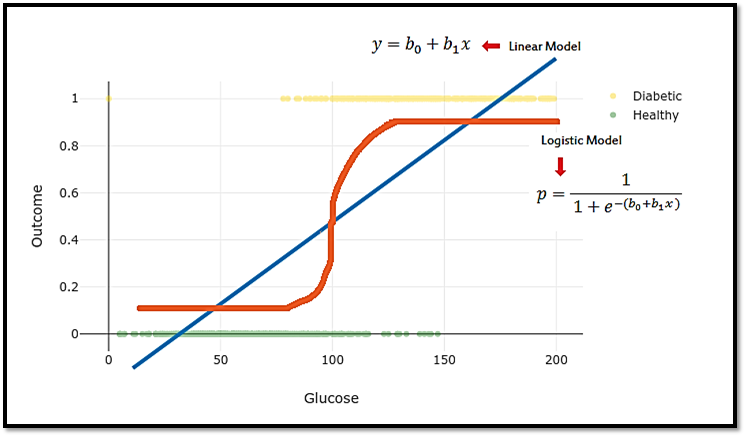

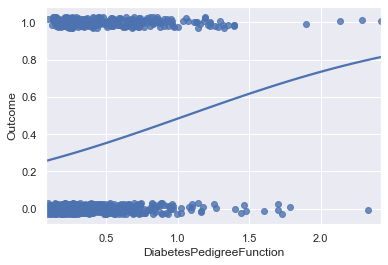

In [4]:
### Plot pedigree and diabetes and add the logistic fit
sns.regplot(x = "DiabetesPedigreeFunction", y = "Outcome", 
            y_jitter = 0.03,
            data = dia, 
            logistic = True,
            ci = None)

# Display the plot
plt.show()
#jitter:Add uniform random noise of this size to either the x or y variables. 
#The noise is added to a copy of the data after fitting the regression, and only influences the look of the scatterplot. This can be helpful when plotting variables that take discrete values

In [5]:
dia["Outcome"].unique()

array([1, 0], dtype=int64)

In [6]:
dia.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Insights
- Age , DPF, ST, BMI, Glucose level affect outcome

In [7]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

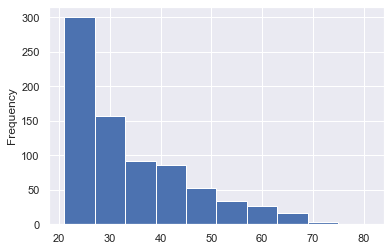

In [9]:
dia['Age'].plot.hist(orientation='vertical')

<AxesSubplot:ylabel='Frequency'>

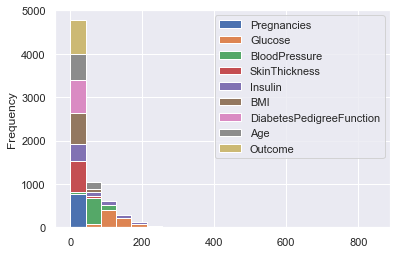

In [10]:
dia.plot.hist(alpha=1, bins=20,stacked = True )##aplha for changing tranparency

## Selecting Feature
-   Divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

<AxesSubplot:>

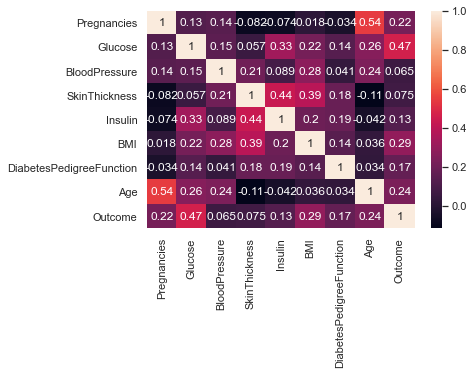

In [11]:
import seaborn as sns
sns.set()
sns.heatmap(dia.corr(),annot=True)

### Data_Modelling 

In [12]:
dia= dia.drop(["Insulin"],axis=1)

In [13]:
#split dataset in features and target variable
X = dia.iloc[:,:-1]# Excluding last one column =features
y = dia.Outcome # Target variable 

In [14]:
# split X and y into training and testing sets
import sklearn
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

## Model Development and Prediction
- First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

- Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#


LogisticRegression()

In [16]:
y_pred=logreg.predict(X_test)

In [17]:
logreg.intercept_

array([-8.29521284])

In [18]:
#no of features
import numpy as np
from sklearn.feature_selection import RFE
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.796875


## Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise

In [19]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
## p>0.05: Not Diabetic , p<0.05:Diabetic

Optimization terminated successfully.
         Current function value: 0.609077
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.058     
Dependent Variable:    Outcome            AIC:                949.5430  
Date:                  2022-05-13 14:20   BIC:                982.0496  
No. Observations:      768                Log-Likelihood:     -467.77   
Df Model:              6                  LL-Null:            -496.74   
Df Residuals:          761                LLR p-value:        1.1780e-10
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1274   0.0286  4.4538 0

### Confusion Matrix
  
  - A confusion matrix is a summary of prediction results on a classification problem.
  - The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
  - The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
  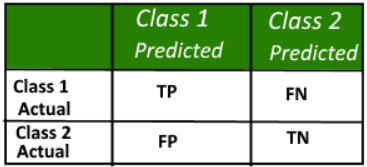

In [21]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[117,  13],
       [ 26,  36]], dtype=int64)

## Classification Rate/Accuracy:
Classification Rate or Accuracy is given by the relation:
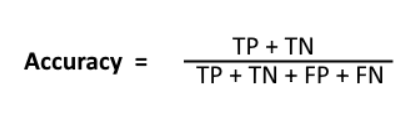

## Recall
- Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (small number of FN)
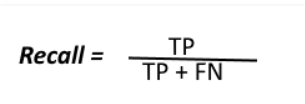

To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).
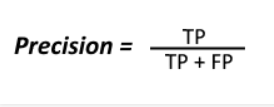


   - **High recall, low precision**:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

   - **Low recall, high precision**:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP).
  -  F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [22]:
import numpy as np
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Train accuracy:", np.round(metrics.accuracy_score(y_train,logreg.predict(X_train))))                                                             
print("F1 Score:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
## Train>Test (Overfit)

Test Accuracy: 0.796875
Train accuracy: 1.0
F1 Score: 0.796875
Precision: 0.7346938775510204
Recall: 0.5806451612903226


### Insights
- Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. 
- Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.
- Classification rate of **80%**, considered as **good accuracy**.
- In this prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.
- Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

## Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5, 257.44, 'Predicted label')

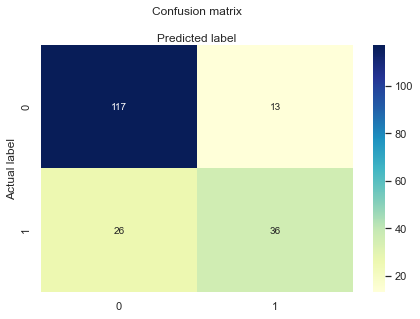

In [23]:
import seaborn as sns
%matplotlib inline
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
r = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
r.sum()

Actual       62
Predicted    49
dtype: int64

## ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

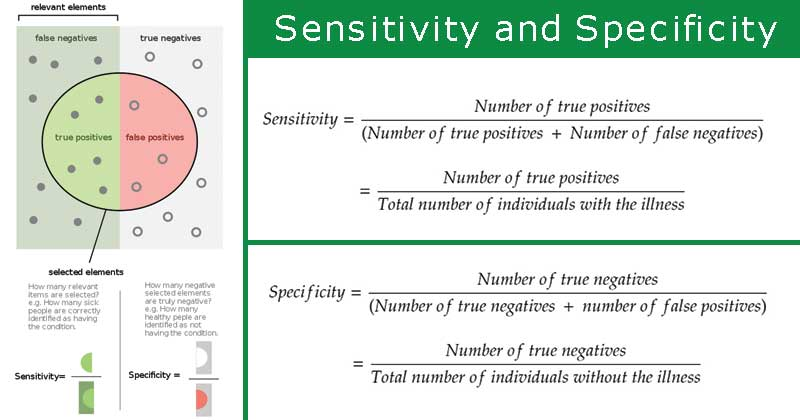

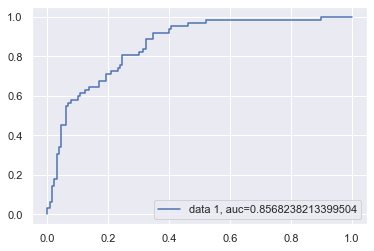

In [25]:

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show() 

## Model Evaluation for Correction

In [26]:
print ("the first 10 predicted probabilities for class 1")
logreg.predict_proba(X_test)[0:10, 1]

the first 10 predicted probabilities for class 1


array([0.94262211, 0.16561693, 0.09082456, 0.64437746, 0.11224603,
       0.03792036, 0.74090219, 0.85036229, 0.40676214, 0.41735016])

In [27]:
## store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.94262211, 0.16561693, 0.09082456, 0.64437746, 0.11224603,
       0.03792036, 0.74090219, 0.85036229, 0.40676214, 0.41735016,
       0.59013633, 0.96144202, 0.2793938 , 0.16850722, 0.12161366,
       0.14424535, 0.84617735, 0.02443472, 0.41314901, 0.24449182,
       0.62763984, 0.3999237 , 0.1741533 , 0.06859748, 0.05418587,
       0.31576871, 0.04258111, 0.90528518, 0.09869487, 0.13256552,
       0.46998243, 0.24036926, 0.10151256, 0.4492532 , 0.09184379,
       0.67853841, 0.46124522, 0.08575462, 0.30234533, 0.70686493,
       0.27479634, 0.21313456, 0.15215818, 0.78201905, 0.82295932,
       0.00748122, 0.07882449, 0.19820558, 0.33871003, 0.28130322,
       0.37229577, 0.1756977 , 0.88671626, 0.4601587 , 0.16244461,
       0.00283586, 0.05731218, 0.56014321, 0.24804152, 0.05277372,
       0.75653745, 0.51835952, 0.09723212, 0.64736266, 0.6418206 ,
       0.87777765, 0.6968052 , 0.13591406, 0.3369131 , 0.10883453,
       0.11476214, 0.34089265, 0.09322657, 0.9432294 , 0.82434

In [28]:
## allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 10

Text(0, 0.5, 'Frequency')

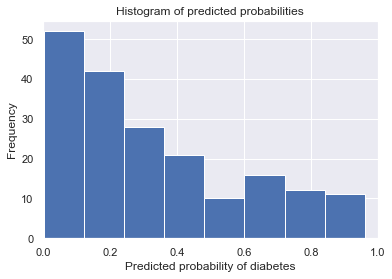

In [29]:
## histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

### We can see from the third bar

- About 45% of observations have probability from 0.2 to 0.3
- Small number of observations with probability > 0.5
- This is below the threshold of 0.5
- Most would be predicted "no diabetes" in this case

### Solution

- Decrease the threshold for predicting diabetes
- Increase the sensitivity of the classifier
- This would increase the number of TP
- More sensitive to positive instances

In [30]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = (y_pred_prob > 0.3).astype(int)

In [31]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.94262211, 0.16561693, 0.09082456, 0.64437746, 0.11224603,
       0.03792036, 0.74090219, 0.85036229, 0.40676214, 0.41735016])

In [32]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [33]:
## previous confusion matrix (default threshold of 0.from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [34]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[94 36]
 [12 50]]


In [35]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_class))
print("Precision:",metrics.precision_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))

Test Accuracy: 0.75
Precision: 0.5813953488372093
Recall: 0.8064516129032258


## Dimensionality reduction
This technique can be defined as, "It is a way of converting the higher dimensions dataset into lesser dimensions dataset ensuring that it provides similar information." These techniques are widely used in machine learning for obtaining a better fit predictive model while solving the classification and regression problems.

Multicollinearity occurs when features (input variables) are highly correlated with one or more of the other features in the dataset. It affects the performance of regression and classification models. PCA (Principal Component Analysis) takes advantage of multicollinearity and combines the highly correlated variables into a set of uncorrelated variable.
PCA PCA is a linear dimensionality reduction technique (algorithm) that transforms a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible.
-    If the variables are not measured on a similar scale, we need to do feature scaling before applying PCA for our data. This is because PCA directions are highly sensitive to the scale of the data. 
- The most important part in PCA is selecting the best number of components for the given dataset

## Principal Component Analysis (PCA)
- PCA is a linear dimensionality reduction method that transforms a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible. 
- In the context of Machine Learning (ML), PCA is an unsupervised machine learning algorithm that is used for dimensionality reduction.
### Feature Extraction using PCA** 
To extract features from the dataset using the PCA technique, firstly we need to find the percentage of variance explained as dimensionality decreases.

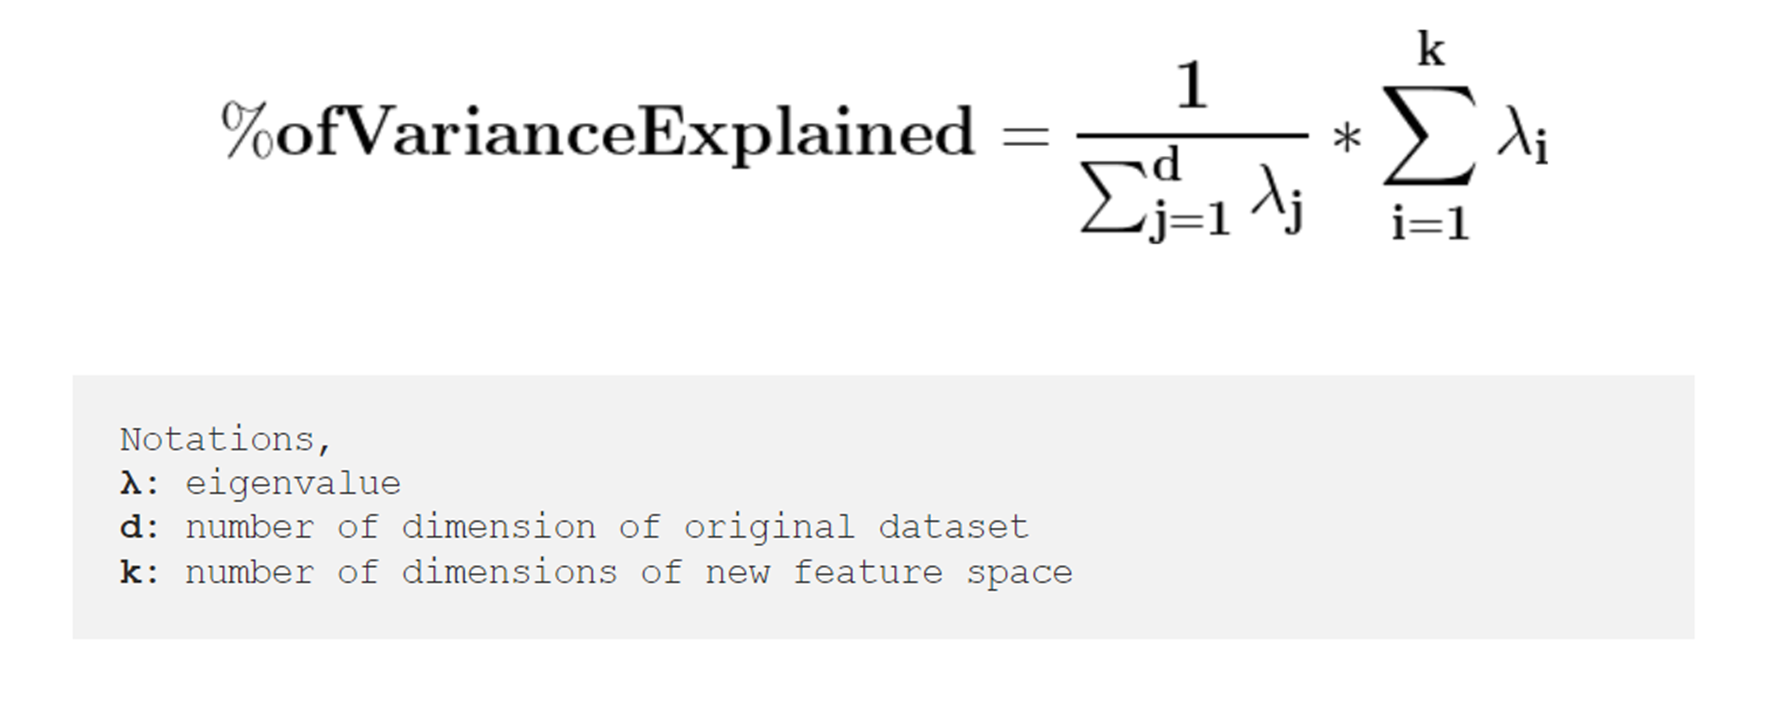




.

## First, we apply PCA keeping all components equal to the original number of dimensions

Eigenvalues:
[1.90603944 1.6013089  0.98107789 0.82605463 0.71179538 0.56337848
 0.41947175]

Variances (Percentage):
[27.19368028 22.84605513 13.99714924 11.7854148  10.15526518  8.03778443
  5.98465095]



Text(0, 0.5, 'Explained variance (%)')

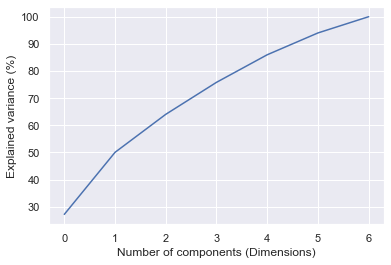

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

## Insight: 
 -  it is observed that for 4 dimensions the percentage of variance explained is 85%. This means we are preserving 85% of variance by projecting higher dimensionality (6) into lower space (4).   

In [37]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3
0 -1.727455 -0.265898  0.459262  0.175621
1  1.164333  0.400208 -0.577386  0.595152
2 -0.453330 -1.598019  1.673982 -0.940617
3  1.635175  0.520461 -0.958071  0.005366
4 -0.992180  2.956951  4.712003  1.773594

Size: 
(768, 4)


<AxesSubplot:>

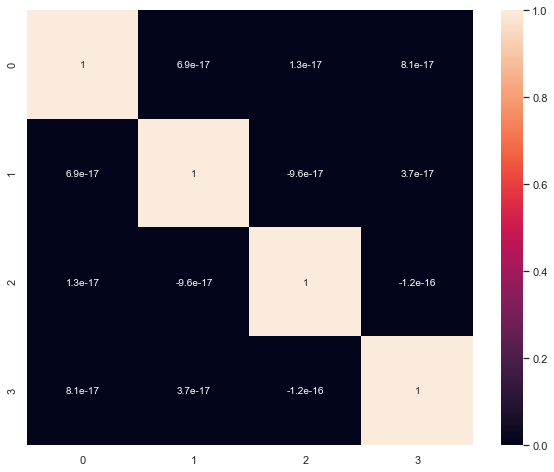

In [38]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

##  We cannot see any correlation between components. This is because PCA has transformed the set of correlated variables in the original dataset into a set of uncorrelated variables.

Train accuracy: 0.77
Test accuracy: 0.75

Test confusion_matrix


Text(30.5, 0.5, 'True')

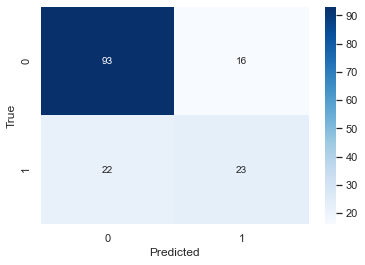

In [39]:
# Make train and test sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, 
                                                            shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## Advantages of Logostic Regression

Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist


## Disadvantages

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.